In [26]:
#네이버 영화 평점 변화 확인하기.
#BeautifulSoup으로 데이터를 가져올 수 없어서 requests를 통해 text형태로 만들어 주었다.
#이럴 경우에는 select()로 원하는 데이터를 크롤링할 수 있다.

from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
import requests

url = 'http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804'
sourceCode = requests.get(url).text
soup = BeautifulSoup(sourceCode, 'lxml')
soup


<!DOCTYPE html>
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta conte

In [28]:
title_temp = soup.select('div["class=tit5"]') #div 태그 내 class=tit5로 영화 title 데이터 불러오기.
title_temp

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=3182

In [32]:
title_temp[0].a.string #a태그의 string인 영화제목만 나오게 가능.

'다크 나이트'

In [36]:
score_temp = soup.select('td["class=point"]') #div 태그 내 class=tit5로 영화 title 데이터 불러오기.
score_temp

[<td class="point">9.32</td>,
 <td class="point">9.28</td>,
 <td class="point">9.25</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.18</td>,
 <td class="point">9.14</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.99</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.87</td>,
 <td class="point">8.86</td>,
 <td class="point">8.84</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.71</td>,
 <td class="point">8.62</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.49</td>,
 <td class

In [41]:
score_temp[0].string #평점만 출력.

'9.32'

In [42]:
#2017년5월1일 부터 100일간 해당 영화 정보를 크롤링.
date = pd.date_range('2017-5-1', periods=100, freq='D') 
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [47]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_score = []

for days in tqdm_notebook(date):
    html = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = requests.get(html.format(date=urllib.parse.quote(days.strftime('%Y%m%d')))).text
    soup = BeautifulSoup(response, 'lxml')
    pointer = len(soup.select('td["class=point"]'))
    
    movie_date.extend([days for n in range(0,pointer)])
    movie_score.extend([soup.select('td["class=point"]')[n].string for n in range(0, pointer)]) 
    movie_name.extend([soup.select('div["class=tit5"]')[n].a.string for n in range(0, pointer)])

A Jupyter Widget

In [58]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'score':movie_score})
movie

,date,name,score
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25
5,2017-05-01,"나, 다니엘 블레이크",9.25
6,2017-05-01,바람과 함께 사라지다,9.24
7,2017-05-01,오즈의 마법사,9.23
8,2017-05-01,벤허,9.22
9,2017-05-01,흑집사 : 북 오브 더 아틀란틱,9.20


In [71]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_unique.head()

,score
name,
10분,8.898.898.898.898.898.898.898.898.898.898.898....
47 미터,7.487.347.797.587.557.537.487.497.467.457.467....
500일의 썸머,8.398.398.398.398.398.398.398.398.39
7년-그들이 없는 언론,8.588.588.588.588.588.588.588.588.588.588.588....
7번째 내가 죽던 날,7.927.867.827.797.807.787.807.827.857.807.807....


movie_best = movie_unique.sort_values(by='score', ascending=False)
movie_best.head()

In [86]:
tmp = movie.query('name == ["극장판 짱구는 못말려 : 습격!! 외계인 덩덩이"]')
tmp

,date,name,score
4155,2017-07-28,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.92
4204,2017-07-29,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.90
4253,2017-07-30,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.89
4305,2017-07-31,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.83
4358,2017-08-01,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.82
4407,2017-08-02,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.83
4457,2017-08-03,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.85
4506,2017-08-04,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.84
4554,2017-08-05,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.84
4601,2017-08-06,극장판 짱구는 못말려 : 습격!! 외계인 덩덩이,8.83


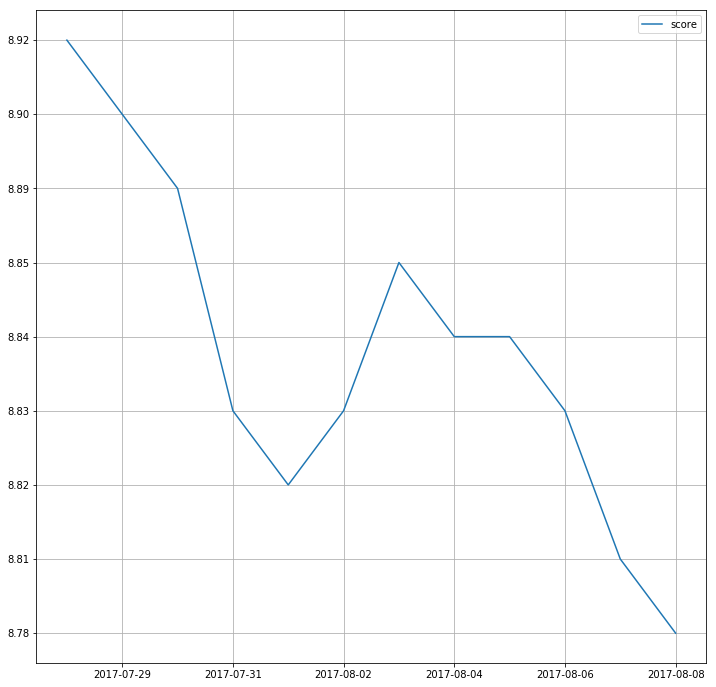

In [87]:
import matplotlib.pyplot as plt
#%matplotlib inline

plt.figure(figsize=(12,12))
plt.plot(tmp['date'], tmp['score'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [94]:
movie.to_excel('../data/movies_made_by_mj2.xls', encoding='UTF-8')